In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib
from scipy.ndimage import median_filter
import sys
import os
import struct
import pywt

sys.path.append(os.path.join(os.getcwd(), 'EC'))
import constants
import Func_read_data
import Func_despike_data
import sensor_info
import Func_DR
import Func_MRFD

importlib.reload(Func_read_data)
importlib.reload(Func_despike_data)
importlib.reload(constants)
importlib.reload(sensor_info)
importlib.reload(Func_DR)
importlib.reload(Func_MRFD)

from Func_read_data import *
from constants import *
from Func_despike_data import *
from sensor_info import *
from Func_MRFD import *
from Func_DR import *

In [1]:
import concurrent.futures

In [ ]:
folder = '/home/engbers/Documents/PhD/EC_data_convert/converted/'
sensor = 'SFC'
start = '2024-01-01 00:00'
end = '2025-03-01 00:00'
output_folder = '/home/engbers/Documents/PhD/EC_data_convert/SFC/202404'

# GET SENSOR INFO
plim, calibration_coefficients, heights = get_sensor_info(sensor, 2024)
slowdata = read_data(folder, 'slow', sensor, start, end, plot_data=False)

file_numbers_array = [i for i in range(502, 498, 6)]

def process_batch(file_number):
    file_numbers = np.arange(file_number, file_number + 8).astype(int).astype(str)
    print(f"Processing files: {file_numbers}")
    
    fastdata_SFC = read_data(folder, 'fast', sensor, start, end, file_numbers=file_numbers)
    
    despiked_fastdata = despike_fast_MAD(
        fastdata_SFC, slowdata, plim, sensor,
        calibration_coefficients=calibration_coefficients,
        plot_despike=False  # Set False if running parallel headless
    )
    
    save_despiked_data(fastdata_SFC, despiked_fastdata, output_folder, sensor)
    return f"Finished {file_number}"

# Run in parallel
with concurrent.futures.ProcessPoolExecutor(max_workers=4) as executor:
    results = list(tqdm(executor.map(process_batch, file_numbers_array), total=len(file_numbers_array)))
print(results)

In [94]:
folder='/run/user/72637/gvfs/smb-share:server=memobi.wsl.ch,share=pub/Turbulence/PEA/Season_2024-2025/DATA/MET/converted/'
folder='/home/engbers/Documents/PhD/EC_data_convert/converted/'
sensor='SFC'
start='2024-01-01 00:00'
end='2025-03-01 00:00'

"""GET SENSOR INFO"""
plim, calibration_coefficients, heights = get_sensor_info(sensor, 2024)

"""READ FAST AND SLOW DATA from folder"""
slowdata=read_data(folder, 'slow', sensor, start, end, plot_data=False)

Using 2024 calibration coefficients
{'A': 4820.04, 'B': 3792900.0, 'C': -115477000.0, 'H2O_Zero': 0.7087, 'H20_Span': 0.9885}


/home/engbers/Documents/Github/DataProcessingScripts/Func_read_data.py:351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slowdata_cleaned[:,'SWdown2'] = slowdata_cleaned['SWdown2'].where(slowdata_cleaned['SWdown2'] > slowdata_cleaned['SWup2'], np.nan)
/home/engbers/Documents/Github/DataProcessingScripts/Func_read_data.py:353: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slowdata_cleaned.loc[:, 'SFTempK'] = slowdata_cleaned['SFTempK'].where(slowdata_cleaned['SFTempK'] >= 210, np.nan)
/home/engbers/Document

(<Figure size 1300x1400 with 7 Axes>,
 array([<Axes: ylabel='Temperature [oC]'>, <Axes: ylabel='RH wrt ice [%]'>,
        <Axes: ylabel='Wind Direction'>, <Axes: ylabel='Wind Speed[ms-1]'>,
        <Axes: ylabel='Net Radiation [Wm-2]'>,
        <Axes: ylabel='Net Radiation [Wm-2]'>,
        <Axes: ylabel='Flowcapt [g/m2/s]'>], dtype=object))

/home/engbers/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


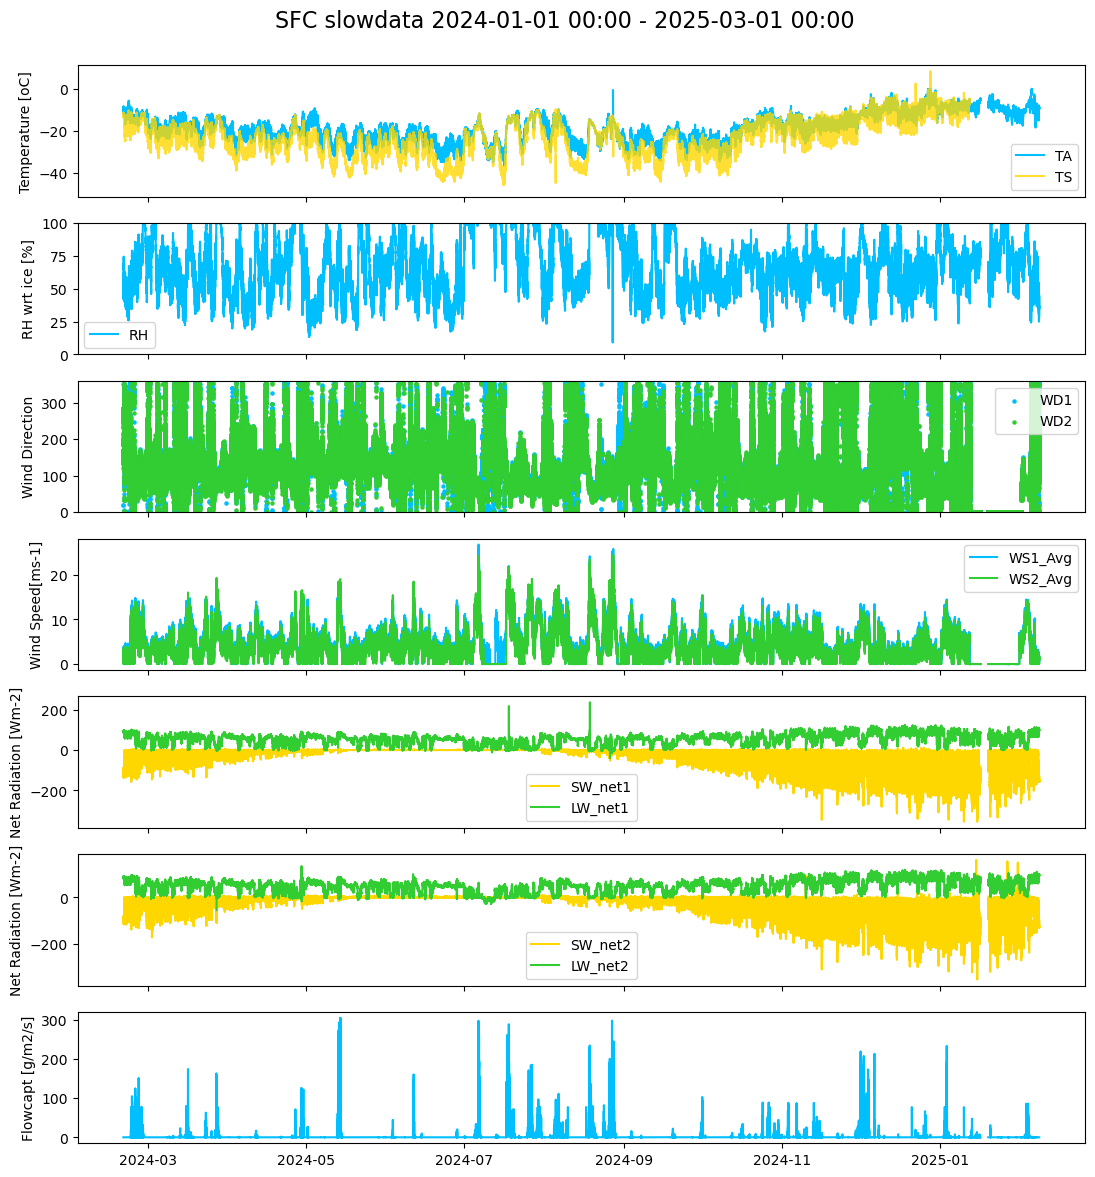

In [99]:
slowdata_cleaned=clean_slowdata(slowdata)
plot_SFC_slowdata(slowdata_cleaned, sensor, start, end)

In [40]:
slowdata_cleaned

,WD1,WD2,TA,RH,HS_Cor,HS_Qty,SFTempK,SWdown1,SWdown2,SWup1,...,LWup2,SWdn,PF_FC4,WS_FC4,WS1_Avg,WS2_Avg,WS1_Max,WS2_Max,WS1_Std,WS2_Std
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2024-02-20 08:21:00,154.9,148.9,-11.09,50.02,1.719,179.0,259.8,491.05,481.32,401.92,...,265.32,543.2,0.0,3.717778,3.203,2.659,3.832,3.332,0.410,0.366
2024-02-20 08:22:00,157.9,145.9,-11.16,50.80,1.720,166.0,259.7,492.31,482.63,402.26,...,265.21,543.9,0.0,2.968333,3.290,2.670,4.165,3.332,0.301,0.253
2024-02-20 08:23:00,156.9,146.7,-11.23,51.01,1.719,175.0,259.7,492.92,483.17,399.10,...,264.77,544.6,0.0,3.583333,3.764,3.050,4.165,3.665,0.282,0.378
2024-02-20 08:24:00,149.9,148.0,-11.25,51.08,1.718,178.0,259.8,492.95,484.81,405.51,...,265.54,545.8,0.0,3.410833,3.688,3.095,4.165,3.499,0.248,0.260
2024-02-20 08:25:00,159.4,151.1,-11.22,50.86,1.718,179.0,259.8,494.30,485.29,401.74,...,265.10,546.4,0.0,3.335556,3.483,2.993,3.998,3.499,0.221,0.231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-08 11:19:00,218.7,212.7,-9.28,37.83,1.596,188.0,NaN,620.99,602.10,473.99,...,282.72,662.9,0.0,4.896667,1.613,1.428,2.166,1.999,0.187,0.275
2025-02-08 11:20:00,215.0,210.5,-9.25,37.58,NaN,240.0,NaN,619.10,599.67,468.52,...,281.99,662.2,0.0,5.666944,1.688,1.510,2.332,2.166,0.325,0.330
2025-02-08 11:21:00,212.4,209.2,-9.29,36.01,1.597,184.0,NaN,607.51,588.95,461.57,...,281.23,655.2,0.0,5.716944,1.792,1.724,2.166,2.166,0.184,0.177


In [ ]:
def rolling_median(data, column_name='HS_Cor', window='1D', max_value=None):
    """
    Function to despike snow height data using a one-day moving median filter.
    
    Parameters:
    - data (pd.DataFrame): The input DataFrame containing snow height data.
    - column_name (str): The name of the column containing snow height data.
    
    Returns:
    - pd.Series: The despiked snow height data.
    """
    if column_name not in data.columns:
        raise ValueError(f"Column '{column_name}' not found in the DataFrame.")
    
    # Apply a one-day moving median filter
    median_filtered = data[column_name].rolling(window=window, center=True, min_periods=1).median()
    if max_value is not None:
        # Remove values above 2m
        median_filtered[median_filtered > max_value] = np.nan
        # Interpolate NaN values
        median_filtered = median_filtered.interpolate(method='linear', limit_direction='both')
    return median_filtered

In [69]:
rolling_median(slowdata_cleaned, column_name='HS_Cor', window='1D', max_value=2)

TIMESTAMP
2024-02-20 08:21:00    1.719
2024-02-20 08:22:00    1.719
2024-02-20 08:23:00    1.719
2024-02-20 08:24:00    1.719
2024-02-20 08:25:00    1.719
                       ...  
2025-02-08 11:19:00    1.599
2025-02-08 11:20:00    1.599
2025-02-08 11:21:00    1.599
2025-02-08 11:22:00    1.599
2025-02-08 11:23:00    1.599
Freq: min, Name: HS_Cor, Length: 509943, dtype: float64

In [71]:
rolling_median(slowdata_cleaned, column_name='SWdown1', window='10min')

TIMESTAMP
2024-02-20 08:21:00    492.935
2024-02-20 08:22:00    492.950
2024-02-20 08:23:00    493.625
2024-02-20 08:24:00    494.300
2024-02-20 08:25:00    495.040
                        ...   
2025-02-08 11:19:00    624.000
2025-02-08 11:20:00    624.540
2025-02-08 11:21:00    624.000
2025-02-08 11:22:00    623.035
2025-02-08 11:23:00    620.990
Freq: min, Name: SWdown1, Length: 509943, dtype: float64

(0.0, 800.0)

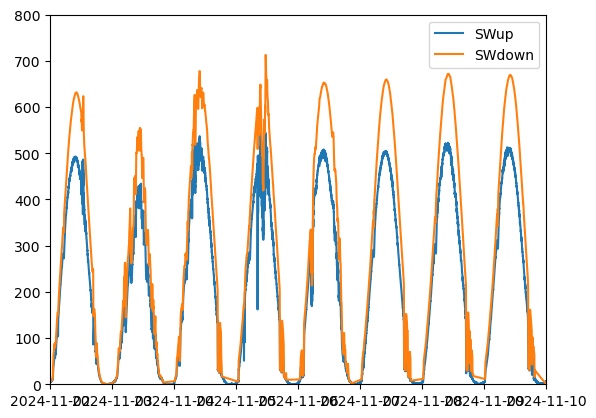

In [100]:
plt.plot(slowdata_cleaned['SWup2'], label='SWup')

plt.plot(rolling_median(slowdata_cleaned, column_name='SWdown2', window='10min'), label='SWdown')
plt.legend()
plt.xlim(pd.Timestamp('2024-11-02 00:00'), pd.Timestamp('2024-11-10 00:00'))
plt.ylim(0, 800)

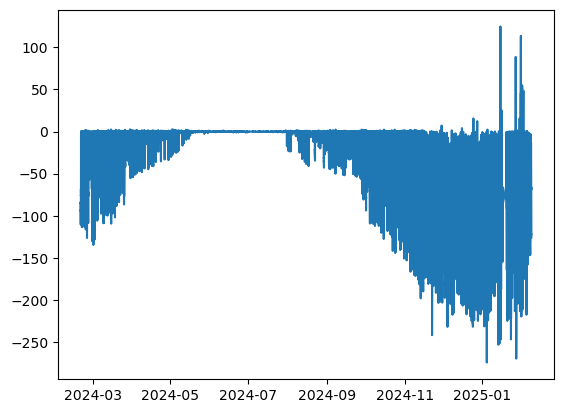

In [101]:
plt.plot(-rolling_median(slowdata_cleaned, column_name='SWdown2', window='1h')+rolling_median(slowdata_cleaned, column_name='SWup2', window='1h'))

In [21]:
import glob
folder='/home/engbers/Documents/PhD/EC_data_convert/SFC/202403/'
fastdata_list = []
units_metadata = {}

for file in sorted(glob.glob(folder + '*.dat')):
    temp_data = pd.read_csv(
        file,
        sep='\t',
        index_col=0,
        header=0,
        low_memory=False,
        na_values=['NaN'])
    temp_data.index = pd.to_datetime(temp_data.index, errors='coerce', format='mixed')
    dropped_row = temp_data.iloc[0]  # Extract the first row as metadata
    temp_data = temp_data.iloc[1:]  # Remove the first row from the data
    units_metadata[file] = dropped_row.to_dict()  # Store metadata in a dictionary
    
    # Convert all columns to numeric
    temp_data = temp_data.apply(pd.to_numeric, errors='coerce')
    
    fastdata_list.append(temp_data)  # Add the cleaned DataFrame to the list

# Concatenate all DataFrames in the list into a single DataFrame
fastdata = pd.concat(fastdata_list, ignore_index=False)

# Print the resulting DataFrame
print(fastdata)

                              Ux       Uy       Uz        Ts  LI_H2Om  LI_Pres
2024-03-01 00:00:00.000  0.48250 -2.40475  0.21900 -20.63008     35.9   1831.0
2024-03-01 00:00:00.100  0.24375 -2.55500  0.21825 -20.75847     36.6   1805.0
2024-03-01 00:00:00.200  0.18450 -2.35725  0.08550 -20.63641     36.4   1834.0
2024-03-01 00:00:00.300  0.45625 -2.39325  0.15050 -20.66336     36.1   1860.0
2024-03-01 00:00:00.400  0.66725 -2.33725  0.10750 -20.62689     36.1   1829.0
...                          ...      ...      ...       ...      ...      ...
2024-03-31 23:59:59.500  1.15900 -3.25900  0.14600 -22.77211     20.6   2065.0
2024-03-31 23:59:59.600  1.34400 -3.01650 -0.00975 -22.53528     20.7   2065.0
2024-03-31 23:59:59.700  1.12675 -2.96000 -0.05600 -22.51001     21.2   2089.0
2024-03-31 23:59:59.800  0.71775 -2.75525 -0.08900 -22.49261     20.9   2091.0
2024-03-31 23:59:59.900  1.11875 -2.67950 -0.04650 -22.50684     21.1   2065.0

[26784000 rows x 6 columns]


In [22]:
"""DOUBLE ROTATE THE DATA TO ALIGN WIND VECTOR WITH X-AXIS"""
fastdata_rot, angles=double_rotation(fastdata)


Double rotation for blocks of 0 days 00:30:00


/home/engbers/Documents/Github/DataProcessingScripts/EC/Func_MRFD.py:66: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gaps = pd.concat([gaps, pd.DataFrame({'idx_before_gap': [len(data)],


MRD for DataFrame
Number of gaps: 1


 88%|████████▊ | 878169/1000000 [09:43<01:20, 1504.87it/s]


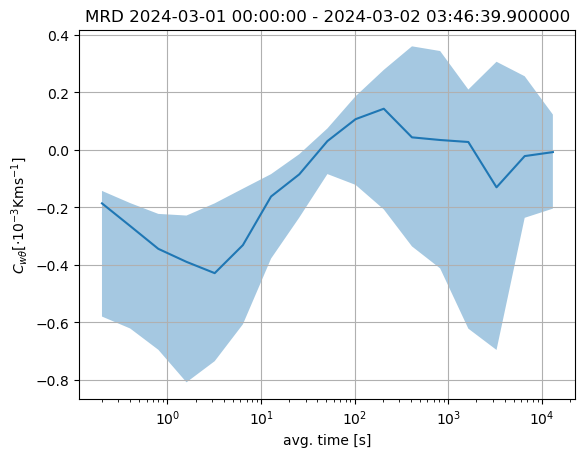

In [5]:
"""DO MRD TO CHECK AVERAGING TIME"""
M=17
(mrd_x, mrd_data, time_middle)=completemrd(fastdata_rot[0:1000000], 'Uz', 'Ts', M, shift=round(int(0.1 * 2**M)), plot=True)

MRD for DataFrame
Number of gaps: 1


 88%|████████▊ | 878169/999999 [08:24<01:10, 1739.83it/s]


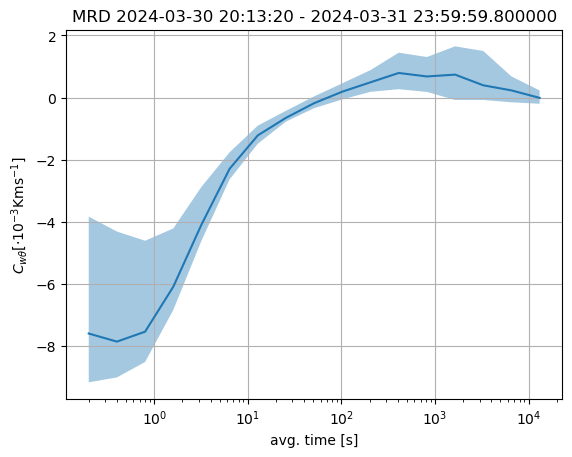

In [6]:
"""DO MRD TO CHECK AVERAGING TIME"""
M=17
(mrd_x, mrd_data, time_middle)=completemrd(fastdata_rot[-1000000:-1], 'Uz', 'Ts', M, shift=round(int(0.1 * 2**M)), plot=True)

/home/engbers/Documents/Github/DataProcessingScripts/EC/Func_MRFD.py:66: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gaps = pd.concat([gaps, pd.DataFrame({'idx_before_gap': [len(data)],


MRD for DataFrame
Number of gaps: 1


 92%|█████████▏| 1376235/1500000 [20:17<01:49, 1130.60it/s]


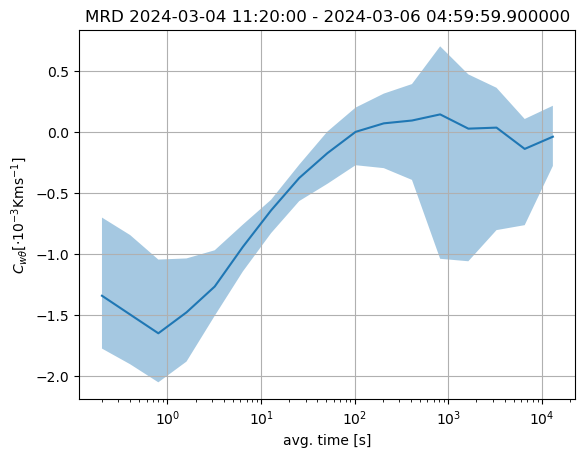

In [23]:
"""DO MRD TO CHECK AVERAGING TIME"""
M=17
(mrd_x, mrd_data, time_middle)=completemrd(fastdata_rot[3000000:4500000], 'Uz', 'Ts', M, shift=round(int(0.1 * 2**M)), plot=True)

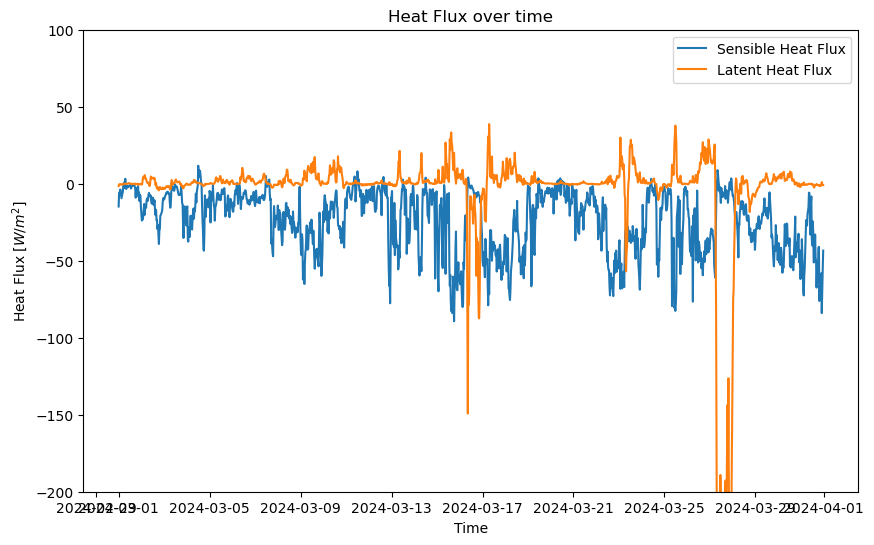

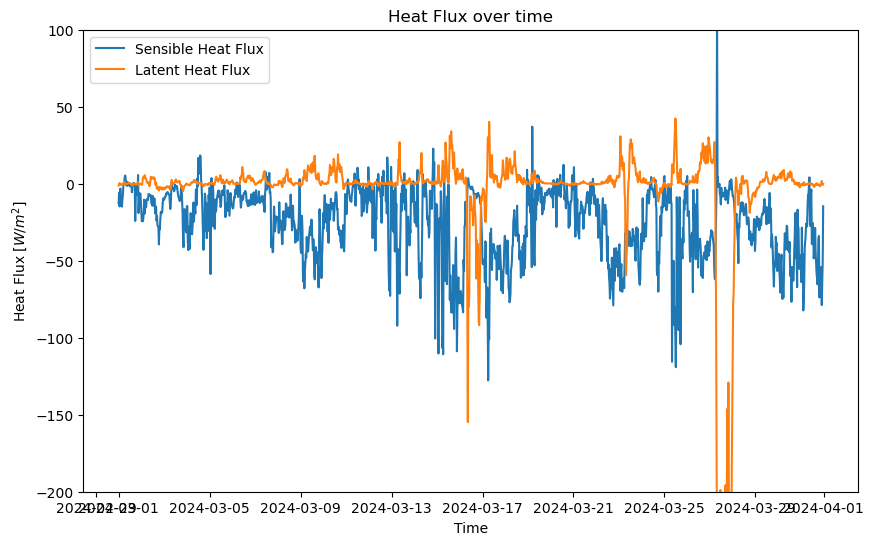

In [13]:
""" CHECK HEATFLUX QUICKLY WITH AVERAGING INTERVAL FOM MRD"""
df_heatflux=check_heat_flux(fastdata_rot, '30s', plot=True)
df_heatflux=check_heat_flux(fastdata_rot, '10min', plot=True)